<a href="https://colab.research.google.com/github/valmazan/Project_2_Part_1/blob/main/project_2_part_3_victoria_almazan1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 - Part 1

For this Task:
Whether you chose 2 pre-approved datasets or 2 datasets from another source, or one of each:

Create a notebook where you have uploaded and shown the .head() of each of your data sets. For each of the proposed datasets, include the following information in text cells:


First choice: Spanish Wine Quality Dataset

1. Source of the Data 
 - Kaggle 

2. Brief description of data
 - This data is is related to red variants in Spanish Wines. Which describes popurality and descriptions of metrics effect on quality. 

3. What is the target?
 - The target is to predict either quality of wine based on the given data or predict the prices.  

4. What does one row represent? (A person?  A business?  An event? A product?)
 - It represents mainly a product. 

5. Is this a classification or regression problem?
 - It can be used as a classification and regression problem. 

6. How many features does the data have?
 - This data set has 11 features. 

7. How many rows are in the dataset?
 - There are 7500 rows. 

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
 - I potientially forsee having to do extensive cleaning for this data as well as fixing missing values as this dataset may be inbalanced.

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay, 
                             PrecisionRecallDisplay, RocCurveDisplay, 
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)
from sklearn import set_config
set_config(display='diagram')

In [72]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRdlCBU471ijgzSbXzxQOsloENGNY4bKDRKn50EcCpq7iSCZPkk2N2l7PReD7xNiOJAK5brD5TKdK9x/pub?gid=1457616118&single=true&output=csv')

In [73]:
df.head(1)

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.0,Toro Red,5.0,3.0


In [74]:
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')

There are 7500 rows, and 11 columns.


Second choice: Stroke Prediction Dataset
1. Source of data
 - Kaggle 

2. Brief description of data
 - This data set is based on strokes being the leading cause of death globally per the World Health Organization. 

3. What is the target?
 - The target is to predict whether it is likley for a patient is likely to get a stroke based on the different attributes. 

4. What does one row represent? (A person?  A business?  An event? A product?)
 - This data represents a person or person(s)

5. Is this a classification or regression problem?
 - classification

6. How many features does the data have?
 - There are 12 features in this dataset

7. How many rows are in the dataset?
 - There are 5110 rows 

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
 - I foresee having potential issues with modeling this data. 

In [75]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQwXfOPBDuob3sFoAmoTRQInrWX9HiJJygee47zGl1o7xHpNRtz6oYtNkO-vOVZeJTXMpkJd2ytO7_k/pub?gid=843931573&single=true&output=csv')

In [76]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [77]:
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')

There are 5110 rows, and 12 columns.


# Project 2 - Part 2

## We will continue will continue with our prediction using the second choice dataset of Stroke Prediction Dataset. 

Using the approved dataset you proposed for project 2 part 1 last week, you will clean and explore the data set.

To meet the requirements for this week you must have:

- Deleted unnecessary columns.
- Deleted duplicate rows.
- Identified and addressed missing values.
- Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
- Produced univariate visuals for the target and all features.
- Identified outliers.
- Clearly commented all of your cleaning steps and described any decisions you made.
- Commit your file to your Github repository and submit the link below.

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [79]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Dropping Duplictes

In [80]:
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


In [81]:
df.drop_duplicates(inplace=True)

Most of our missing values come from the BMI column. 

In [82]:
print(f'There are {df.isna().sum().sum()} missing values.')

There are 201 missing values.


In [83]:
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [84]:
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

## Adressing Categorical Data Inconsistencies

In [85]:
print('Unique Gender :\n', df['gender'].unique())
print('\n')

print('Unique ever_married :\n', df['ever_married'].unique())
print('\n')

print('Unique work_type :\n', df['work_type'].unique())
print('\n')

print('Unique residence_type :\n', df['residence_type'].unique())
print('\n')

print('Unique smoking_status :\n', df['smoking_status'].unique())
print('\n')

Unique Gender :
 ['Male' 'Female' 'Other']


Unique ever_married :
 ['Yes' 'No']


Unique work_type :
 ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


Unique residence_type :
 ['Urban' 'Rural']


Unique smoking_status :
 ['formerly smoked' 'never smoked' 'smokes' 'Unknown']




- Also I wanted to understand the 'children' and understood that children are also added to this dataset. 

In [86]:
children_work = df['work_type'] == "children"

df[children_work]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1
245,49669,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1
249,30669,Male,3.00,0,0,No,children,Rural,95.12,18.0,Unknown,0
282,33759,Female,3.00,0,0,No,children,Urban,73.74,16.0,Unknown,0
290,55680,Male,13.00,0,0,No,children,Urban,114.84,18.3,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5089,56714,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0
5094,28048,Male,13.00,0,0,No,children,Urban,82.38,24.3,Unknown,0
5095,68598,Male,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,0
5098,579,Male,9.00,0,0,No,children,Urban,71.88,17.5,Unknown,0


- I noticed that there was 'other' under the gender column and only one that was represent.

In [87]:
other_gen = df['gender'] == "Other"

df[other_gen]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


- I decided to drop the 'id' column because I felt like it really didnt add much value to out data and would just create confusion. 

In [88]:
df.drop(columns=['id'], inplace=True)
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

##Producing Univariate Visuals 

In [89]:
import seaborn as sns

To get a better understanding of the data set below we created a few visuals to help better understand the target. 

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


## Figure 1 
- The figure below shows a representation of the amount of strokes, 1 if the patient had a stroke or 0 if not. 

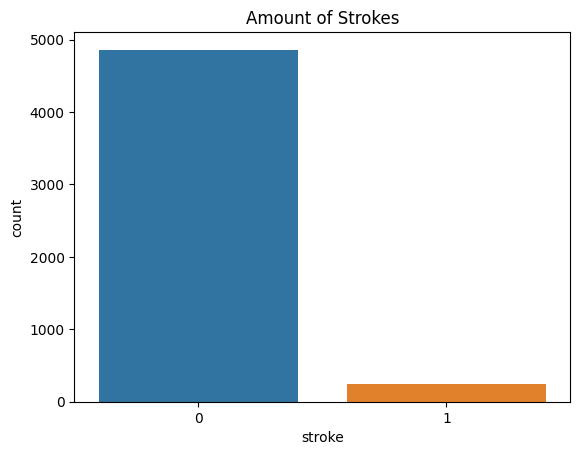

In [91]:
ax = sns.countplot(data=df,x='stroke')
ax.set_title('Amount of Strokes');

## Figure 2 
- Shows the amount of 'Gender' participating in this dataset.

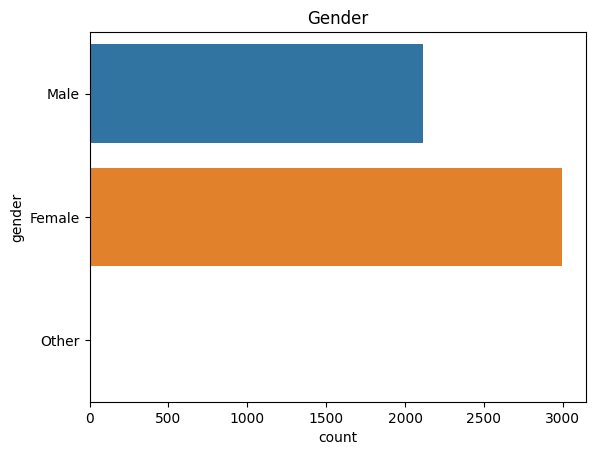

In [92]:
ax = sns.countplot(data=df, y='gender')
ax.set_title('Gender');

## Figure 3
- Represents the number of participants that are married.

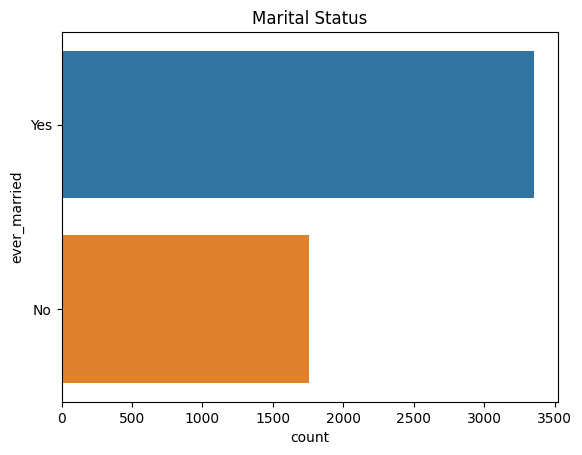

In [93]:
ax = sns.countplot(data=df, y='ever_married')
ax.set_title('Marital Status');

## Figure 4

- Bold text We also added the Residental Areas of the particiapants, I may consider taking this column later on before we split the data. 

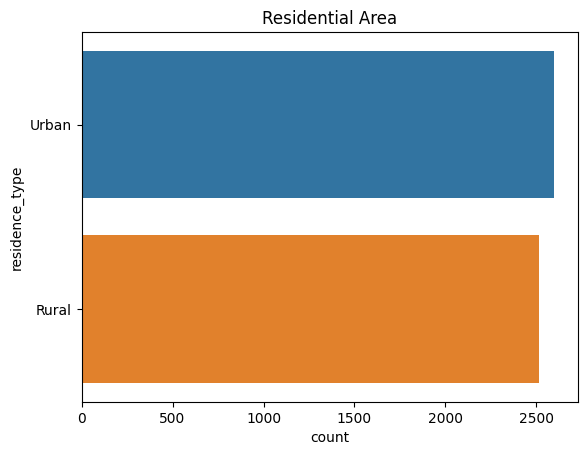

In [94]:
ax = sns.countplot(data=df, y='residence_type')
ax.set_title('Residential Area');

## Figure 5
- Shows Work Types of participants.

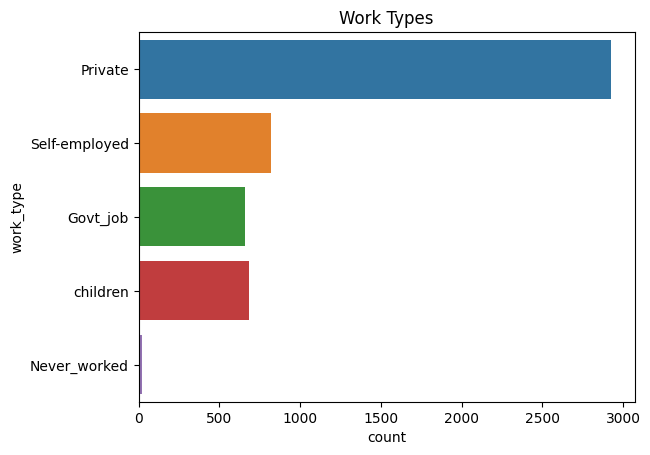

In [95]:
ax = sns.countplot(data=df,y='work_type',order = ['Private','Self-employed','Govt_job','children','Never_worked'])
ax.set_title('Work Types');

## Figure 6
- Represents the smoking status of the participants.

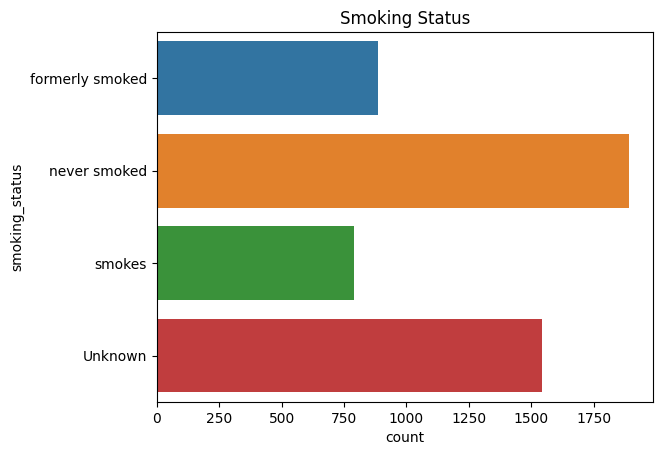

In [96]:
ax = sns.countplot(data=df,y='smoking_status',order = ['formerly smoked','never smoked','smokes','Unknown'])
ax.set_title('Smoking Status');

##Figure 7
- Shows the number of strokes by Gender

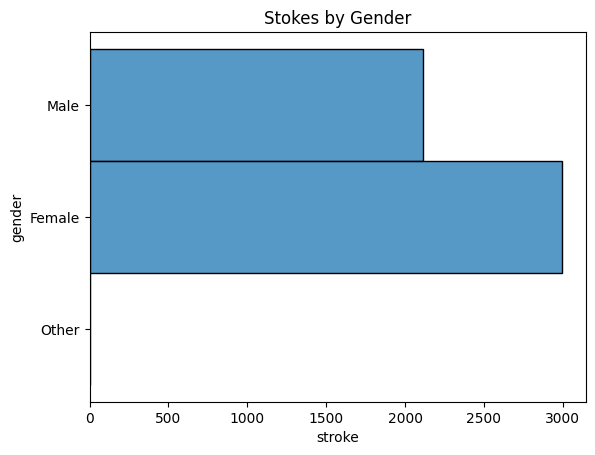

In [97]:
ax = sns.histplot(data=df, y = 'gender')
ax.set_title('Stokes by Gender')
ax.set_xlabel('stroke');

## Figure 8 
- Represents the Age of participated who had Strokes. 

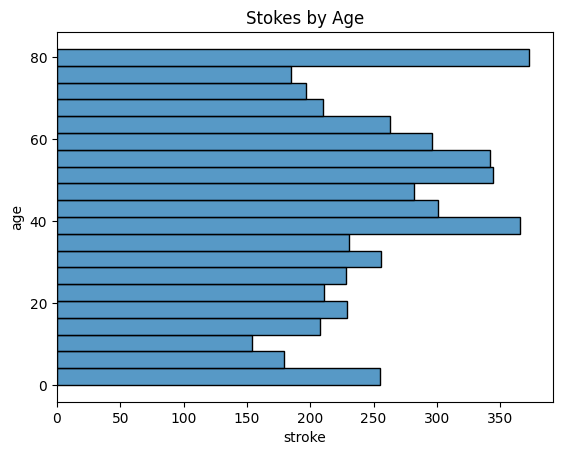

In [98]:
ax = sns.histplot(data=df, y = 'age')
ax.set_title('Stokes by Age')
ax.set_xlabel('stroke');



---



# Project 2 - Part 3

##Assignment:

Note: You are not clustering your data for this assignment.

1. For this part of the project, you will continue your data exploration by:
 1. Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.
 2. Creating multivariate (multiple variables) exploratory visualizations to further understand your data and search for trends.




---



Below we have a figure of a heatmap correlation to display strong correlations of our dataset features. 

In [99]:
corr = df.corr()

corr

<ipython-input-99-1b9f4b865a31>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


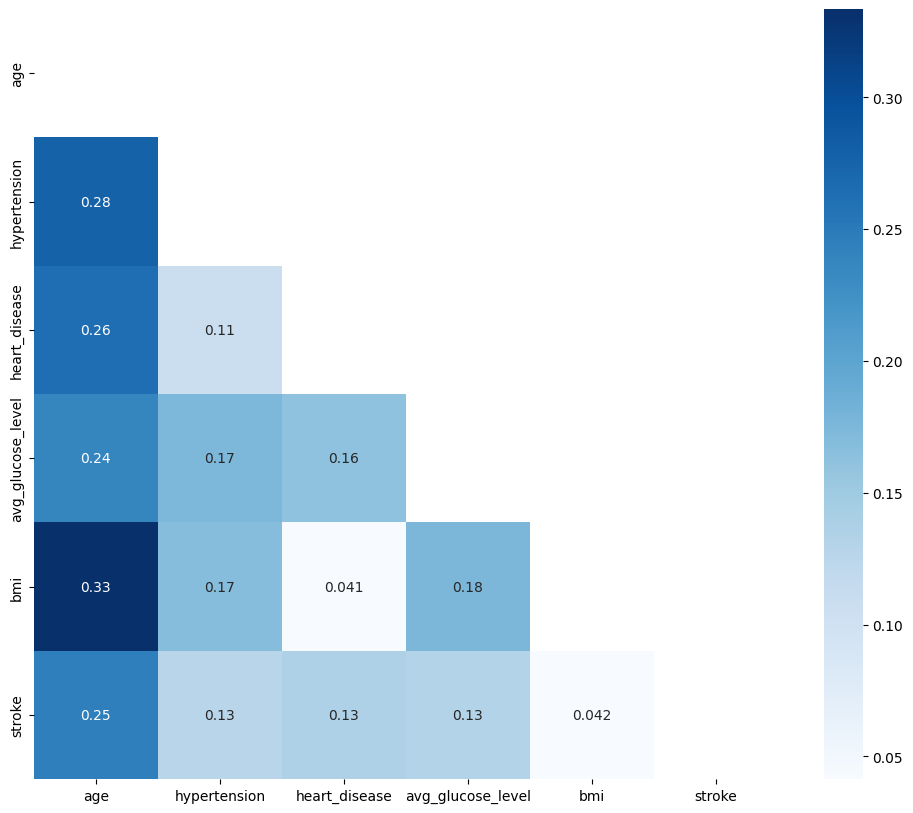

In [100]:
# Correlation Heatmap

mask = np.triu(np.ones_like(corr))
fig, ax = plt.subplots(figsize = (12, 10))

ax = sns.heatmap(corr, cmap= 'Blues', annot = True, mask=mask);

For the Correlation Heatmap, we can see the highest correlation between bmi, age and the least correlations were in hypertension, heart disease and avg glucose level. 



---



2. Then, choose two visualizations from your analysis that demonstrate key trends you found that will be of interest to a stakeholder. These visuals should be reporting quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the insight associated with each visual. Both of these visualizations should be easily understood by a non-technical audience (Neither of these should be histograms, boxplots, or correlation plots).

  1. These plots should be so simple, and so easy to read, that a 6th grader could understand them in less than 10 seconds without asking questions. They don't need to be fancy, they need to CLEARLY show an interesting trend or correlation between features in your data.

For Figure 1, we see can see Age vs BMI with the index of gender. We can anaylze and see the Women tend to have a higher risk of strokes based on body mass index. 



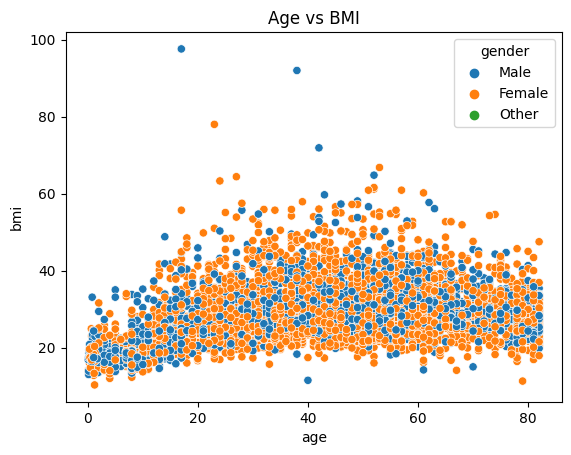

In [108]:
# Figure 1
ax = sns.scatterplot(data = df, x = 'age', y = 'bmi', hue='gender' )
ax.set_title('Age vs BMI');

For Figure 2, we can see a line distinction, Addtionally based on this line we can see that the average age would be around late 20s early 30s. 

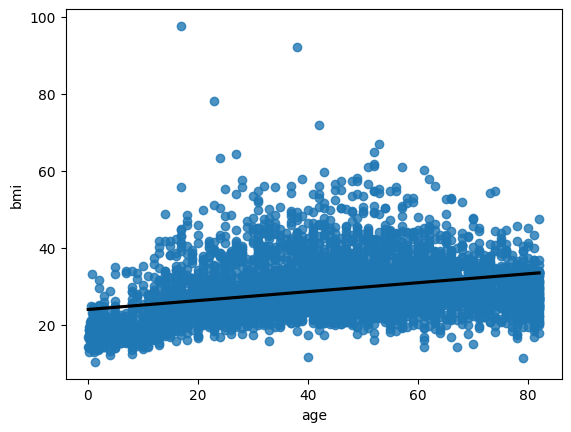

In [110]:
# Figure 2
sns.regplot(data = df, x = 'age', y = 'bmi', line_kws= {'color':'black'});

Figure 3 shows another correlation between avg glucose level and bmi with a legend that displays smoking status. Based on this data we can see that most plots seem to be more evenly  placed. 

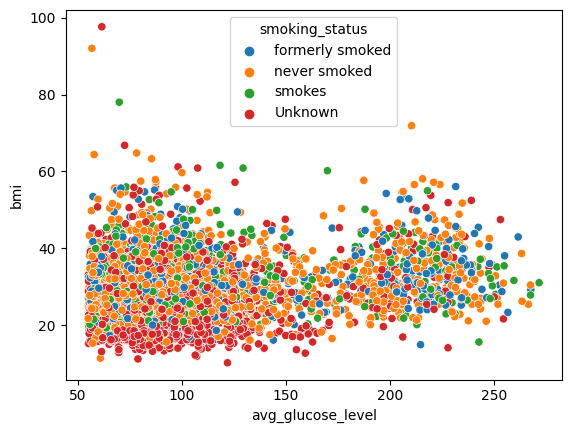

In [103]:
# Figure 3 
sns.scatterplot(data = df, x = 'avg_glucose_level', y = 'bmi', hue = 'smoking_status');

Figure 4 displays the correlation bmi and avg glucose level with an reg line, we can see the correlation at a certain point in the bmi index

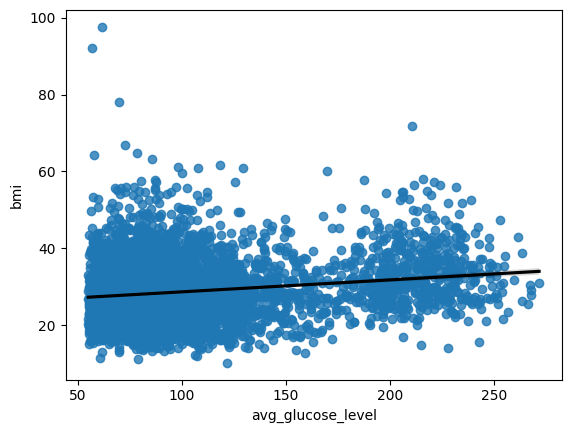

In [104]:
# Figure 4
sns.regplot(data = df, y = 'bmi', x = 'avg_glucose_level',line_kws= {'color':'black'});